The main purpose of this notebook is to check the words in both the raw fake and raw real data, along with the llm-refined version in order to document and visualize the most frequently used words in all for comparison purposes in order to see the extent of differences and similarities between all, or if even such a thing exists.

The goal is to see if LLM-refined posts are more similar to real or fake human-written posts, the result will support us with our question research, that is "Can humans catch the human-written fake posts when the same post is LLM-refined?". The hypotheses is LLM-refined fake jobs posts is more likely to mimic real jobs posts.

One thing to be aware of is that the raw dataset is highly biased and imbalanced, however, since the main goal of this notebook is to do EDA, it'll not cause a big issue, but acknowledging the matter is important.

In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

# reading the dataset
real_jobs= pd.read_csv(
  "../1_datasets/cleaned_data/real_jobs.csv", keep_default_na= False
)

fake_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/fake_jobs.csv", keep_default_na=False
)

llm_refined_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/llm_refined_fake_posts2.csv", keep_default_na=False
)

# number of fake and real posts
print("Total real jobs detected:", len(real_jobs))
print("Total human-written fake jobs detected:", len(fake_jobs))
print("Total LLM-refined fake jobs detected:", len(llm_refined_jobs))

Total real jobs detected: 17014
Total human-written fake jobs detected: 866
Total LLM-refined fake jobs detected: 866


In [60]:
# words that have high frequency but have no
# actual weight so it is better to extract them
stopwords = {
    "with",
    "working",
    "people",
    "work",
    "experience",
    "company",
    "skills",
    "role",
    "position",
    "bachelors",
    "amp",
    "will",
    "start",
    "benefits",
    "possess",
    "written",
    "while",
    "record",
    "required",
    "good",
    "high",
    "employees",
    "entry",
    "your",
    "seeking",
    "clients",
    "office",
    "proven",
    "able",
    "paid",
    "offer",
    "full",
    "within",
    "service",
    "from",
    "other",
    "must",
    "ability",
    "more",
    "that",
    "including",
    "time",
    "years",
    "have",
    "looking",
    "been",
    "will",
    "this",
    "their",
    "into",
}

def clean_text(text):
    # checks if the input text is Nan, None,
    # Nat and returns an empty string incase
    # CSV file had empty cells
    if pd.isna(text):
        return ""

    # converts to lowercase
    text = str(text).lower()
    # removes all characters except for alphabets and spaces
    text = "".join([char for char in text if char.isalpha() or char == " "])

    # removes stopwords
    words = [word for word in text.split() if word not in stopwords and len(word) > 3]  # noqa: E501

    # returns a string and consumes less memory
    return " ".join(words)

# process all column and combine words
all_words_in_real = []
all_words_in_Hfake = []
all_words_in_LLMfake = []

for col in [
    "company_profile",
    "description",
    "requirements",
    "benefits",
]:
    fake_text = fake_jobs[col].apply(clean_text)
    real_text = real_jobs[col].apply(clean_text)
    for row in fake_text:
        all_words_in_Hfake.extend(row.split())

    for row in real_text:
        all_words_in_real.extend(row.split())

for col in [
    "refined_company_profile",
    "refined_description",
    "refined_requirements",
    "refined_benefits",
]:
    llm_text = llm_refined_jobs[col].apply(clean_text)
    for row in llm_text:
        all_words_in_LLMfake.extend(row.split())

# check frequency of fake words count
fake_words_count = pd.Series(all_words_in_Hfake).value_counts()

# check frequency of real words count
real_words_count = pd.Series(all_words_in_real).value_counts()

# check frequency of llm-refined posts
llm_words_count = pd.Series(all_words_in_LLMfake).value_counts()

# convert to a DataFrame for fake posts
fake_freq_df = pd.DataFrame(fake_words_count).reset_index()
fake_freq_df.columns = ["word", "count"]

# convert to a DataFrame for real posts
real_freq_df = pd.DataFrame(real_words_count).reset_index()
real_freq_df.columns = ["word", "count"]

# convert to a DataFrame for llm-refined posts
llm_freq_df = pd.DataFrame(llm_words_count).reset_index()
llm_freq_df.columns = ["word", "count"]

# save the data in a csv file
fake_file_path = "../4_data_analysis/cleaned_most_frequent_words/fake_words_count.csv"  # noqa: E501

fake_freq_df.to_csv(fake_file_path, index=False)

real_file_path = "../4_data_analysis/cleaned_most_frequent_words/real_words_count.csv"  # noqa: E501

real_freq_df.to_csv(real_file_path, index=False)

llm_file_path = "../4_data_analysis/cleaned_most_frequent_words/LLM_refined_words_count.csv"

llm_freq_df.to_csv(llm_file_path, index=False)

Visualizing the most frequent words in fake job posts across the four columns all together: company profile, description, benefits, and requirements. I've chosen these columns because the major text information is mainly there, and everything related to the position is also there.

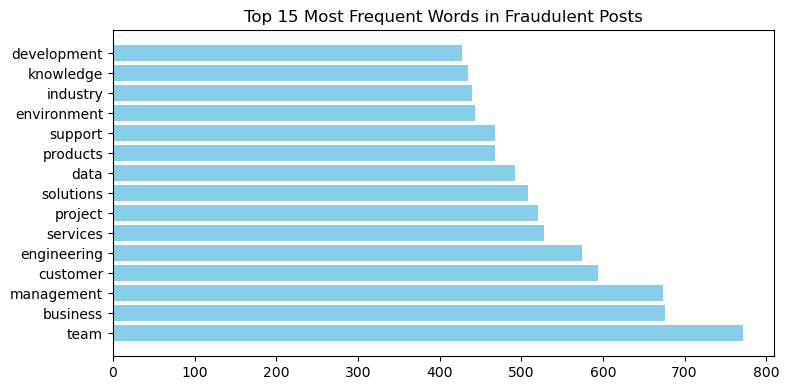

In [38]:
# reading the file of fake words count
fake_df = pd.read_csv(
    "../4_data_analysis/cleaned_most_frequent_words/fake_words_count.csv"
)

fake_top15 = fake_df.head(15)

# plot histogram
plt.figure(figsize=(8, 4))
plt.barh(fake_top15["word"], fake_top15["count"], color="skyblue")
plt.title("Top 15 Most Frequent Words in Fraudulent Posts")
plt.tight_layout()

# save diagram in a png file
fake_dia_file = (
    "../4_data_analysis/cleaned_most_frequent_words/fake_visual_words_count.png"  # noqa: E501
)

plt.savefig(fake_dia_file)

plt.show()

Visualizing the most frequent words in real job posts.

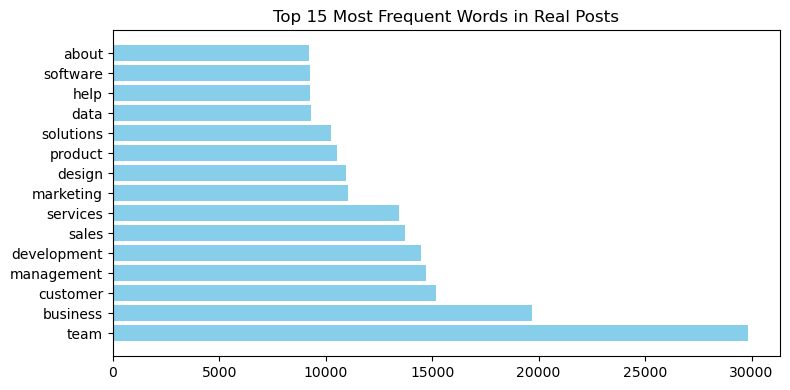

In [24]:
# reading the file of real words count
real_df = pd.read_csv(
    "../4_data_analysis/cleaned_most_frequent_words/real_words_count.csv"
)

real_top15 = real_df.head(15)

# plot histogram
plt.figure(figsize=(8, 4))
plt.barh(real_top15["word"], real_top15["count"], color="skyblue")
plt.title("Top 15 Most Frequent Words in Real Posts")
plt.tight_layout()

# save diagram in a png file
real_dia_file = (
    "../4_data_analysis/cleaned_most_frequent_words/real_visual_words_count.png"  # noqa: E501
)

plt.savefig(real_dia_file)

plt.show()

Visualizing the most frequent words in LLM-refined fake job posts.

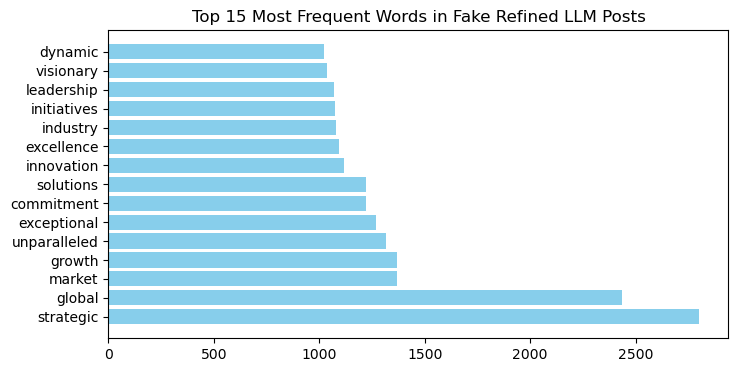

In [12]:
# visualizing the top 15 words used by LLM refined posts
refined_llm_df = pd.read_csv(
    "../4_data_analysis/cleaned_most_frequent_words/LLM_refined_words_count.csv"  # noqa: E501
)

refined_llm_top15 = refined_llm_df.head(15)

plt.figure(figsize=(8, 4))
plt.barh(
    refined_llm_df.head(15)["word"],
    refined_llm_df.head(15)["count"],
    color="skyblue",
)
plt.title("Top 15 Most Frequent Words in Fake Refined LLM Posts")
plt.tight_layout

refined_llm_dia_file = (
    "../4_data_analysis/cleaned_most_frequent_words/LLM_visual_words_count.png"
)

plt.savefig(refined_llm_dia_file)

plt.show()

Visualize and compare between the top 10 words in human-written real job posts, human-written fake job posts, and LLM-refined fake job posts across all four columns.

Shape of the data: (24, 4)


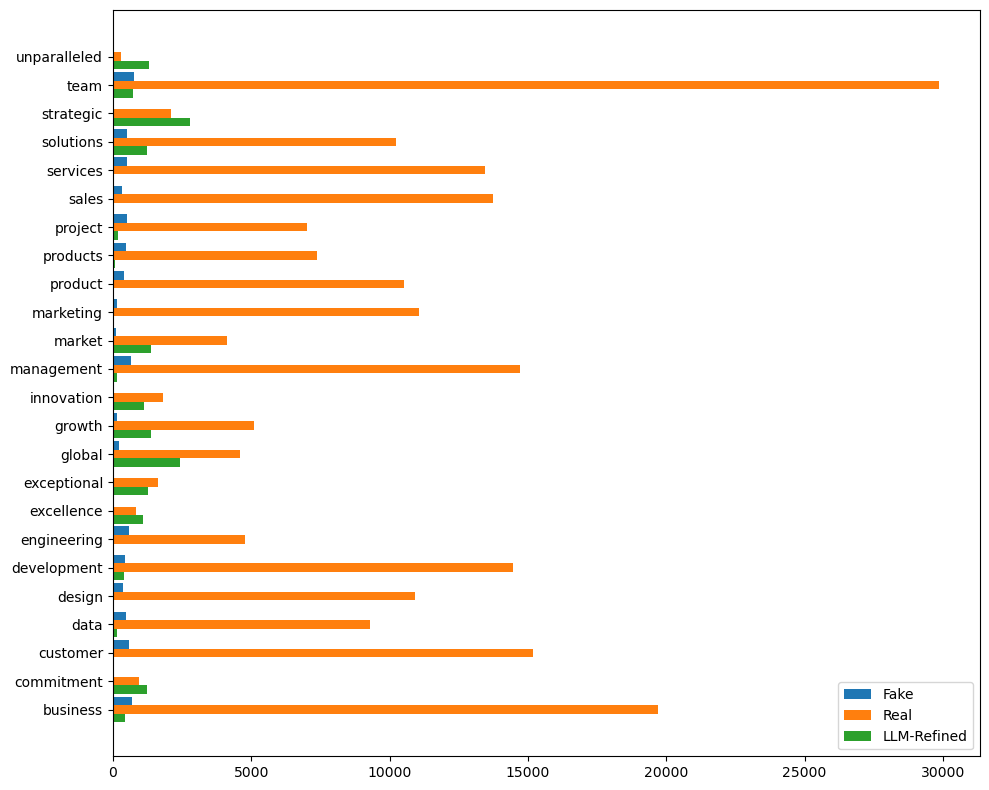

In [50]:
# visualize all 3 sections together
fake_top10 = fake_top15.head(10).rename(columns={"count": "fake"})
real_top10 = real_top15.head(10).rename(columns={"count": "real"})
refined_llm_top10 = refined_llm_top15.head(10).rename(columns={"count": "LLM refined"})  # noqa: E501

# combining all words from all three sections and dropping duplicates
all_top_words = pd.Series(
    pd.concat([fake_top10["word"], real_top10["word"], refined_llm_top10["word"]])  # noqa: E501
).drop_duplicates()

# checking the counts for words that appear in one
# or two of the three sections from the original DataFrames
top_fake = fake_freq_df[fake_freq_df["word"].isin(all_top_words)]
top_real = real_freq_df[real_freq_df["word"].isin(all_top_words)]
top_llm_refined = llm_freq_df[llm_freq_df["word"].isin(all_top_words)]  # noqa: E501

# merging all words from the three sections in one place
combined_words = top_fake.merge(top_real, on="word", how="outer").merge(
    top_llm_refined, on="word", how="outer"
)

# naming the columns and filling NaN values
combined_words.columns = ["Word", "Fake", "Real", "LLM-Refined"]
combined_words = combined_words.fillna(0)

print("Shape of the data:", combined_words.shape)
combined_words.head(23)

# creating a numeric position for each word in the y-axis
y = np.arange(len(combined_words))
height = 0.30

plt.figure(figsize=(10, 8))

plt.barh(y + height, combined_words["Fake"], height, label="Fake")
plt.barh(y, combined_words["Real"], height, label="Real")
plt.barh(y - height, combined_words["LLM-Refined"], height, label="LLM-Refined")  # noqa: E501

plt.yticks(y, combined_words["Word"])
plt.tight_layout()
plt.legend()
plt.show

# saving the file
all_sections_dia_file = (
    "../4_data_analysis/cleaned_most_frequent_words/all_sections_words_count.png"  # noqa: E501
)
plt.savefig(all_sections_dia_file)

From this graph, we can see a clear difference between the words count among all sections, especially for real jobs. We can also see that LLM-refined posts use words that are found in real posts more often compared to the human-written fake jobs posts. However, since 95% of the raw dataset is real jobs, we can't really see much from this graph. Instead, I thought of expressing the extend of similarities using mathematical expressions.

I used cosine similarity because it compares angles between word count vectors, not magnitude. It ignores document length and it's already normalized by nature. 

To closer the value to 1, means the similarity is very big.

In [51]:
# Extract the frequency vectors for comparison
vectors = combined_words[["Fake", "Real", "LLM-Refined"]].to_numpy()

# Compute cosine similarity matrix
cos_sim = cosine_similarity(vectors.T)  # Transpose: columns are vectors
cos_sim_df = pd.DataFrame(
    cos_sim,
    index=["Fake", "Real", "LLM-Refined"],
    columns=["Fake", "Real", "LLM-Refined"],
)

print("Cosine Similarity Matrix:\n", cos_sim_df)

Cosine Similarity Matrix:
                  Fake      Real  LLM-Refined
Fake         1.000000  0.933026      0.31272
Real         0.933026  1.000000      0.32163
LLM-Refined  0.312720  0.321630      1.00000


The hypotheses was that the LLM-refined fake jobs posts will be more likely similar to real jobs posts, and will diverge from the human-written fake jobs posts. However, it's not the case here! It's diverging from both human-written real and fake jobs. This brings us back to the fact that the refinement process may have removed or smoothed out characteristics that made fake posts appear realistic making them stand out even more.

More importantly that, the real jobs and fake jobs extracted from the raw dataset are very similar! Any attempt to distinguish between them using basic text features (like word frequencies) may struggle, as the language used overlaps a lot.

One of the reasons I could think of is the fact that I checked the words frequency among four columns all together, maybe, if I checked the words frequency in each column on its own, then we might see a difference!

In [52]:
def get_word_frequencies(df, column):
    cleaned_text = df[column].apply(clean_text)
    all_words = " ".join(cleaned_text).split()
    return pd.DataFrame(Counter(all_words).most_common(), columns=["word", "count"])

# DESCRIPTIONS
real_desc_freq = get_word_frequencies(real_jobs, "description")
fake_desc_freq = get_word_frequencies(fake_jobs, "description")
llm_desc_freq = get_word_frequencies(llm_refined_jobs, "refined_description")

# REQUIREMENTS
real_req_freq = get_word_frequencies(real_jobs, "requirements")
fake_req_freq = get_word_frequencies(fake_jobs, "requirements")
llm_req_freq = get_word_frequencies(llm_refined_jobs, "refined_requirements")

# BENEFITS
real_ben_freq = get_word_frequencies(real_jobs, "benefits")
fake_ben_freq = get_word_frequencies(fake_jobs, "benefits")
llm_ben_freq = get_word_frequencies(llm_refined_jobs, "refined_benefits")

In [53]:
def analyze_and_plot_section(real_freq_df, fake_freq_df, llm_freq_df, section_name):
    # Get top 10 words
    real_top10 = real_freq_df.head(10).rename(columns={"count": "Real"})
    fake_top10 = fake_freq_df.head(10).rename(columns={"count": "Fake"})
    llm_top10 = llm_freq_df.head(10).rename(columns={"count": "LLM-Refined"})

    # Combine all top words and remove duplicates
    all_top_words = pd.Series(
        pd.concat([real_top10["word"], fake_top10["word"], llm_top10["word"]])
    ).drop_duplicates()

    # Filter frequency DataFrames by top words
    top_real = real_freq_df[real_freq_df["word"].isin(all_top_words)]
    top_fake = fake_freq_df[fake_freq_df["word"].isin(all_top_words)]
    top_llm = llm_freq_df[llm_freq_df["word"].isin(all_top_words)]

    # Merge and fill
    combined = top_fake.merge(top_real, on="word", how="outer").merge(
        top_llm, on="word", how="outer"
    )
    combined.columns = ["Word", "Fake", "Real", "LLM-Refined"]
    combined = combined.fillna(0)

    # Bar chart
    y = np.arange(len(combined))
    height = 0.3

    plt.figure(figsize=(10, 8))
    plt.barh(y + height, combined["Fake"], height, label="Fake")
    plt.barh(y, combined["Real"], height, label="Real")
    plt.barh(y - height, combined["LLM-Refined"], height, label="LLM-Refined")
    plt.yticks(y, combined["Word"])
    plt.title(f"Top Words in {section_name}")
    plt.tight_layout()
    plt.legend()

    # Cosine similarity
    vectors = combined[["Fake", "Real", "LLM-Refined"]].to_numpy()
    cos_sim = cosine_similarity(vectors.T)
    cos_sim_df = pd.DataFrame(
        cos_sim,
        index=["Fake", "Real", "LLM-Refined"],
        columns=["Fake", "Real", "LLM-Refined"],
    )

    print(f"\nCosine Similarity Matrix — {section_name}")
    print(cos_sim_df)

    # return cos_sim_df



Cosine Similarity Matrix — description
                 Fake      Real  LLM-Refined
Fake         1.000000  0.896912     0.266834
Real         0.896912  1.000000     0.282456
LLM-Refined  0.266834  0.282456     1.000000

Cosine Similarity Matrix — requirements
                 Fake      Real  LLM-Refined
Fake         1.000000  0.958241     0.390701
Real         0.958241  1.000000     0.403191
LLM-Refined  0.390701  0.403191     1.000000

Cosine Similarity Matrix — benefits
                 Fake      Real  LLM-Refined
Fake         1.000000  0.880715     0.989409
Real         0.880715  1.000000     0.902628
LLM-Refined  0.989409  0.902628     1.000000


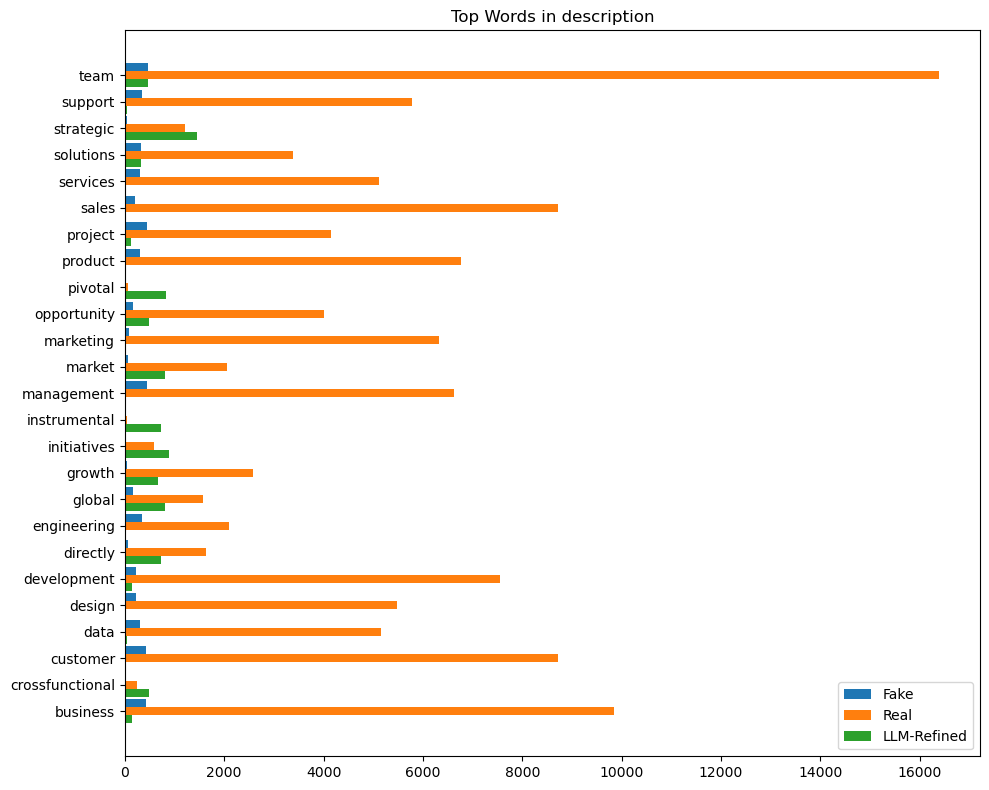

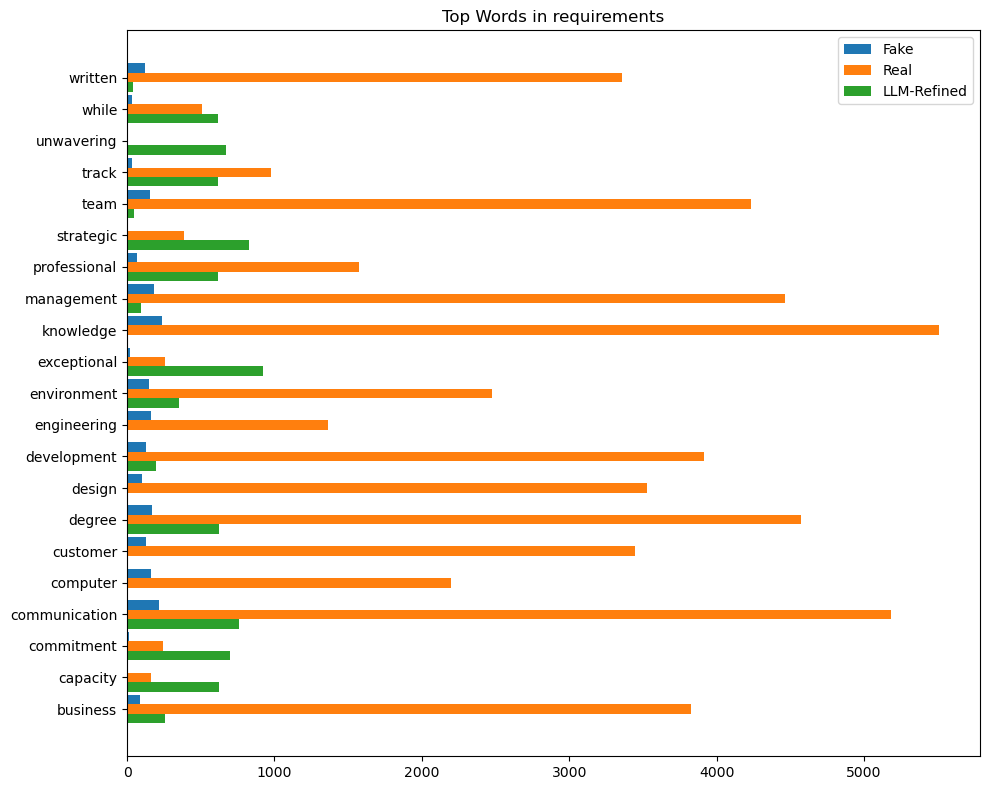

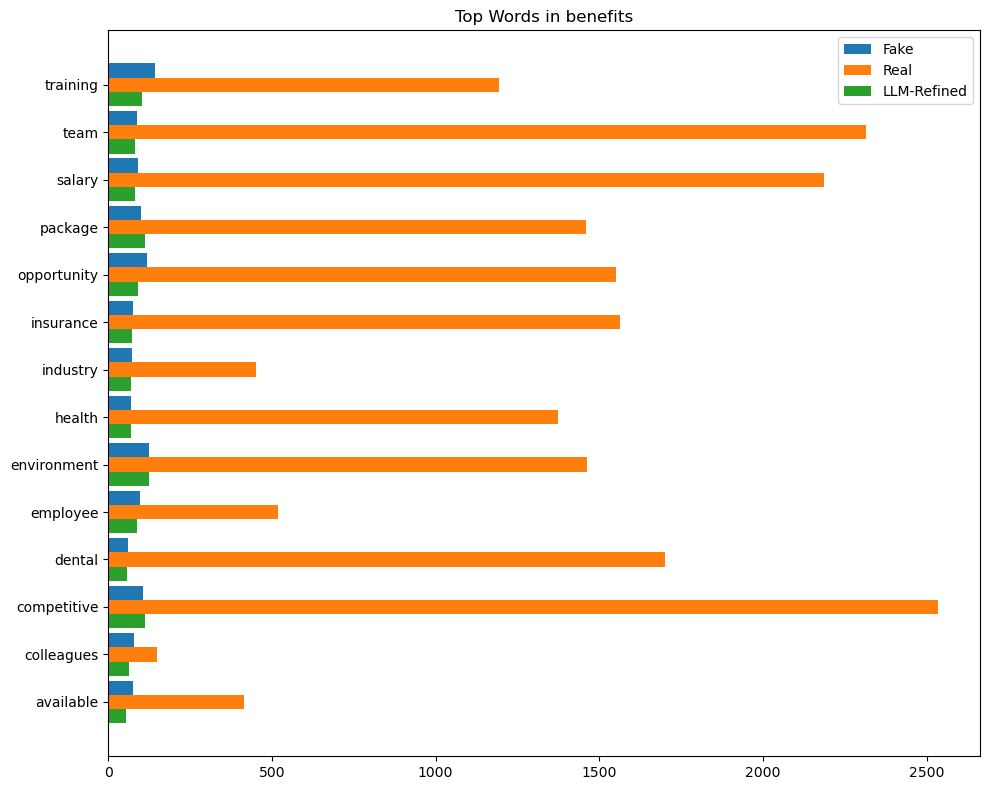

In [62]:
# For description
analyze_and_plot_section(real_desc_freq, fake_desc_freq, llm_desc_freq, "description")

# For requirements
analyze_and_plot_section(real_req_freq, fake_req_freq, llm_req_freq, "requirements")

# For benefits
analyze_and_plot_section(real_ben_freq, fake_ben_freq, llm_ben_freq, "benefits")

We see that the situation is still the same for both description and requirements, the LLM-refined posts still diverge from both real and fake jobs posts. However, this is not the case for benefits!

We clearly see that the difference between real and fake jobs was not very much in benefits, but, it's also not a high difference with the LLM-refined as well!

The main reason for this might be the fact that jobs benefits tend to use templated language, whether the job is real, fake, or fake but LLM-refined, this section probably uses a limited vocabulary.

# Final thoughts

Maybe the words count/frequency was not a very ideal analysis to start with in the first place for the hypotheses. What we can do differently in terms of analysis is to analyze other aspects, such as sentence complexity, vocabulary richness, and average sentence length.

The LLM-refinement produced text that diverges stylistically and lexically from both real and fake job posts, suggesting a third writing domain that could be leveraged to detect synthetically altered content.